# Training Techniques Implementation

In today's lesson we will explore how different parameters like weight initialization, dropout, regularization, and others can affect training and testing accuracy. 


## We will be working with the same numbers data set

<img src="https://i0.wp.com/syncedreview.com/wp-content/uploads/2019/06/MNIST.png" style="height:450px">

# 1) Packages 


Let's first import all of the packages we need for this assignment. 

- [tensorflow](https://www.tensorflow.org/) is what we will use to build our neural networks 

- [matplotlib](https://matplotlib.org/) helps to plot data and visualize the data

- [numpy](https://numpy.org/) helps us make our training and test set arrays

- [keras](https://keras.io/) helps us to make our neural networks 



In [1]:
#Author: Leila Abdelrahman 
#Adapted from the Classify Images of Clothing Website by François Chollet, 2017, MIT





#Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt







# Import the MNIST dataset 

In [2]:


mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#Loading the dataset should return 4 NumPy arrays

#Next, add class name labels, as these are not included with the datast. Stoer them in an
#array for later as we plot the images
class_names =  ['0', '1', '2' , '3', '4', '5', '6', '7', '8', 
               '9']

# Look at dataset parameter

In [3]:
#Look at the parameters of the dataset

#The data set contains 60,000 images in the training set, each represented as 28*28 poxels
print(train_images.shape)





(60000, 28, 28)


In [4]:
#There are 60,000 traning labels 
len(train_labels)

60000

In [5]:
#Each label has an integer between 0 and 9;
print(train_labels)


[5 0 4 ... 5 6 8]


In [6]:
#Thee are 10,000 images in the test set, each 28*28 pixels
print(test_images.shape)

(10000, 28, 28)


# Data before normalization

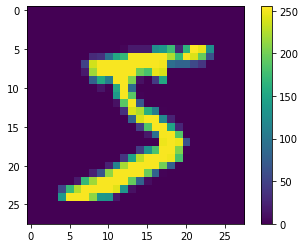

In [7]:
#Preprocess the data so that we can normalize the pixel values between a range of 0 and 1. 
#Normalization helps with training accuracy 
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Normalize the data by dividing by largest pixel value 

In [8]:
#We now want to scale the values. Do this by dividing by 255, hwhich is the largest pixel value 

train_images = train_images/255.0
test_images = test_images/255.0


# Look at new normalized pictures

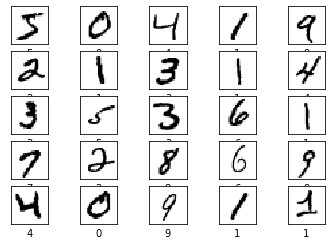

In [9]:
#Verify that the data is in the correct format and that it is standardized 

for i in range (25):
    plt.rcParams.update({'font.size': 10})
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

# Build the original model. 

## Every neural network is composed of layers. Each layer repreents extracting  representations from the data fed into them. 

- This neural network has 3 layers. 
- The first layer (Flatten), transforms the image data from a 2d array to a 1d array
- The second layer is a Dense function (a densly connected neural layer, which as 128 nodes, or neurons) 
- The last layer has 10 nodes, and uses the softmax activation function. 

Softmax activation functions return probability scores  tht sum to 1. MAKE SURE THE NUMBER OF NODES IN THE LAST LAYER IS EQUAL TO THE NUMBER OF CLASSES. 

In [10]:


model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)) ,
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])



## Let's look at the anatomy of the model. This outlines what each layer is, and how many parameters (arguments) there are. 

In [11]:


print(model.summary())



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


# Now it's your turn: Build a model with different types of Weight initialization

You can try Xavier, Random, All Zeroes, etc. 

In [21]:
# Define model2 as including weight initialization
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)) ,
    keras.layers.Dense(128, activation = 'relu' , kernel_initializer = "glorot_normal"),
    keras.layers.Dense(10, activation = 'softmax' , kernel_initializer = "glorot_normal")
    
])

# Now it's your turn: Build a model with Dropout.
Now, add dropout to your model2 and call it model3.
Make sure to play around with the dropout rate to see how that affects accuracy. 

In [18]:
#Define model3 with dropout 
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)) ,
    keras.layers.Dense(128, activation = 'relu' , kernel_initializer = "glorot_normal"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax' , kernel_initializer = "glorot_normal")
    
])

# Complile the models with optimizer, loss, and metrics 

- Loss function: steers the model in the right direction. Loss is calculated by how accurate the model is at classifying
- Optimizer: the model uses an optimization funcition to minizmize the loss function
 - Metrics: Records accuracy of how well the model correctly classifies the images
 
 
 
 Change the loss function and the optimizer function to see how that may affect accuracy

In [23]:
# Here is an example for the orginal model

model.compile(optimizer = 'adam' , 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy'])


#Add code here to compile and add different loss and optimizers for the new model2 and model3



#Model2:


model2.compile(optimizer = 'nadam' , 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy'])





#Model3:




model3.compile(optimizer = 'adagrad' , 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy'])







# Train the models

- Step 1: feed the training data to the model. In this case it is the train_images and train_labels arrays
- Step 2: Model learns over a series of epochs. Each epoch represents one "step" in the learning process
- Step 3" Ask the model to make predictions about the test set. 


In [24]:
#Original model

model.fit(train_images, train_labels, epochs = 10)







Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2622 - accuracy: 0.9259
Epoch 2/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.1143 - accuracy: 0.9661
Epoch 3/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0788 - accuracy: 0.9767
Epoch 4/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0593 - accuracy: 0.9817
Epoch 5/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0447 - accuracy: 0.9865
Epoch 6/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0357 - accuracy: 0.9891
Epoch 7/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0288 - accuracy: 0.9912
Epoch 8/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0232 - accuracy: 0.9930
Epoch 9/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0197 - accuracy: 0.9939
Epoch 10/10
60

In [25]:
#Add code here for model2:


model2.fit(train_images, train_labels, epochs = 10)



Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0136 - accuracy: 0.9961
Epoch 2/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0119 - accuracy: 0.9961
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0104 - accuracy: 0.9968
Epoch 4/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0095 - accuracy: 0.9973
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0092 - accuracy: 0.9970
Epoch 6/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0067 - accuracy: 0.9980
Epoch 7/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0067 - accuracy: 0.9979
Epoch 8/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0057 - accuracy: 0.9981
Epoch 9/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0064 - accuracy: 0.9982
Epoch 10/10
60

In [26]:

#Add code here for model3:

model3.fit(train_images, train_labels, epochs = 10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4255 - accuracy: 0.8780
Epoch 2/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4206 - accuracy: 0.8788
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4145 - accuracy: 0.8826s - loss: 0.4143 - accuracy: 0.
Epoch 4/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4100 - accuracy: 0.8814
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3995 - accuracy: 0.8853
Epoch 6/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3965 - accuracy: 0.8876
Epoch 7/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3920 - accuracy: 0.8872
Epoch 8/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3885 - accuracy: 0.8884
Epoch 9/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3825 - 

# Now test the models on the test set and evaluate accuracy 

You will notice that the test accuracy is less than the training accuracy. Look at how overfitting compares after adding weight 
initialization and dropout


In [27]:

#model1:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\n Model 1 Test accuracy:', test_acc)


#model2: Add code here:



test_loss, test_acc = model2.evaluate(test_images, test_labels, verbose = 2)
print('\n Model 2 Test accuracy:', test_acc)

#model3: Add Code here: 


test_loss, test_acc = model2.evaluate(test_images, test_labels, verbose = 2)
print('\n Model 3 Test accuracy:', test_acc)








10000/1 - 0s - loss: 0.0443 - accuracy: 0.9752

 Model 1 Test accuracy: 0.9752
10000/1 - 0s - loss: 0.0501 - accuracy: 0.9793

 Model 2 Test accuracy: 0.9793
10000/1 - 0s - loss: 0.0501 - accuracy: 0.9793

 Model 3 Test accuracy: 0.9793
